# Shunique - Company Background
Shunique is a hot new online women's shoe company that is known for their unique shoe combinations.  Founded by auto tire amgnate Joseph Flatbush and his daugthers Jenna and Jamaica.  He believed that just like car tires, women's shoes should be unique and stylish. However, a bold choice to release a "silver vegan leather sandal" that had very few sales has left the company to turn towards their data in search of the next big shoe hit.  The company doesn't know much about their data and have not been keeping up with their monthly, quarterly, and yearly performance.    You were hired as a data analyst to help them answer key questions.  You were given all the shoe sales transactions from Aug 2018 to Aug 2020.  They do know a few statistics:  (1) They have generated \$166,936,995 in total sales since opening (2) The top 3 cities for number of shoes sold are Washington, DC, Houston, Tx, and El Paso, Tx (See Figure below).  They have also provided you with a codebook describing all the columns and their potential values.
<img src="num_shoes_sold_per_city.png">

In [1]:
from scipy import stats

import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Shunique = pd.read_csv('transactions.csv')

In [2]:
Shunique.columns

Index(['first_name', 'last_name', 'email', 'city', 'address', 'state',
       'transactionDate', 'transactionID', 'time', 'quantity', 'name', 'color',
       'materials', 'prices', 'feature', 'category', 'cost', 'Date'],
      dtype='object')

In [3]:
Shunique.dtypes

first_name          object
last_name           object
email               object
city                object
address             object
state               object
transactionDate     object
transactionID       object
time                object
quantity             int64
name                object
color               object
materials           object
prices             float64
feature             object
category            object
cost               float64
Date                object
dtype: object

In [4]:
Shunique.shape

(1105257, 18)

In [5]:
Shunique.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,04/04/2019,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,02/03/2019,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,07/21/2019,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,01/26/2019,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,12/13/2019,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


## Question 1 (Code Below)

**(1a.)** what was the name of the Best selling shoe and total sales for the Second Fiscal Quarter(Q2) of 2020?

**(1b)**. How did it compare to that shoe's sales in 2019 Q2?  Is it the hottest selling shoe in Q2 2019?  What else can you say about the Q2 2019 versus Q2 2020 performance of this shoe relative to other top sellers during these quarters?  

**Definition of Quarters:**
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4) 

**Answer 1a:** The 'Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3' was the best selling shoe for quarter 2 of 2020; with total revenue of \\$102,480.00.

**Answer 1b:** When looking at quarter 2 of 2019, we can see that the shoe had the same revenue of \\$102,480.00; which leaves it flat year over year. 

It was not the hottest selling shoe in quarter 2 of 2019, instead the 'Diamond Eternity Band' was the best selling with \\$138,566.67 in revenue for the period. 

Looking year over year, we can see that not only did the 'Mirak' shoe remain flat, but other top sellers total revenue decreased; pushing that shoe into the top selling spot. Overall revenue for quarter 2 of 2020 declined comparative to the prior year. 

In [6]:
Shunique['transactionDate'] = pd.to_datetime(Shunique['transactionDate'])

Sales_2020 = Shunique[(Shunique['transactionDate'] >= '1/1/2020') & (Shunique['transactionDate'] <= '12/31/2020')]

Q2_2020 = Sales_2020[Sales_2020['transactionDate'].dt.quarter == 2]

Q2_2020.groupby(by='name').sum().sort_values('cost', ascending=False)[:5]

,quantity,prices,cost
name,,,
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,68320.00,102480.00
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,630,46020.40,69030.60
Diamond Eternity Band,15,54586.87,62984.85
Yu&yu Women's Shoes Pointed Toe Flat Heel Flats Shoes More Colors Available,512,37632.54,54738.24
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,420,28436.07,45935.19


In [61]:
Sales_2019 = Shunique[(Shunique['transactionDate'] >= '1/1/2019') & (Shunique['transactionDate'] <= '12/31/2019')]

Q2_2019 = Sales_2019[Sales_2019['transactionDate'].dt.quarter == 2]

Q2_2019.groupby(by='name').sum().sort_values('cost', ascending=False)[:5]

,quantity,prices,cost
name,,,
Diamond Eternity Band,33,83979.80,138566.67
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,1218,82836.72,133459.16
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,72590.00,102480.00
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,680,41560.41,74371.26
'pebbles' Tall Gladiator Pump (women),26,36800.00,59800.00


## Question 2 (Code Below)

Over the life of the collected data,

**(2a)** What state has the highest total sales? 

**(2b)** Which state/district/terrritory sold the most shoes over this same period?  

**(2c)** Which state/district/terrritory sold the least number of shoes over this period?

**Answer 2a:** Texas has the higest total sales over the life of the collected data, with \\$4,046,697.79 in revenue for the time period.

**Answer 2b:** Texas sold the most shoes over the time period, with 43,399 pairs sold.

**Answer 2c:** By comparison, the District of Columbia sold the least shoes over the time period, with 2,770 pairs sold.

In [8]:
Shunique.groupby(by='state').sum().sort_values('cost', ascending=False)[:5]

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79
California,42987,2549023.99,4040519.98
Florida,40655,2439983.57,3915786.35
New York,38431,2307715.10,3711601.23
Virginia,36322,2207662.72,3506240.78


In [9]:
Shunique.groupby(by='state').sum().sort_values('quantity', ascending=False)[:5]

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79
California,42987,2549023.99,4040519.98
Florida,40655,2439983.57,3915786.35
New York,38431,2307715.10,3711601.23
Virginia,36322,2207662.72,3506240.78


In [10]:
Shunique.groupby(by='state').sum().sort_values('quantity', ascending=True)[:5]

,quantity,prices,cost
state,,,
District of Columbia,2770,156416.91,256872.67
Wyoming,33244,1995366.07,3157960.68
Hawaii,33382,1953617.98,3103894.39
Vermont,33416,2031303.16,3195624.82
Rhode Island,33431,1999880.69,3159869.28


## Question 3 (Code Below)
Jenna Flatbush wants to know what combination of shoes to introduce into low-performing cities.  You came up with the idea that they should start marketing combinations that are already selling well.

**(3.)** What combination of attributes have the most sales? [ color, materials, feature, category ]

**Answer 3:** When considering the best combination of attributes, wedges that are black, made of leather; and have the travel friendly feature, deliver the most sales. Over the life of the collected data, those attributes combined had \\$881,131.43 in revenue. 

In [11]:
Shunique.groupby(by=['color', 'materials', 'feature', 'category']).sum().sort_values('cost', ascending=False)[:5]

 

quantity    prices      cost
color    materials feature           category                              
black    leather   travel friendly   wedges        1423 529582.16 881131.43
         rubber    diabetic approved wedges         167 461160.00 713090.00
         leather   padding           heels         2095 327130.26 523562.83
metallic nubuck    strappy           wedges         206 294400.00 473800.00
black    leather   wearable tech     sandals       1858 251163.59 409756.96

## Question 4 (Code Below)

Jamaica Flatbush is unsure of how Shunique performed last year (2019). 

**(4a)** What were total sales?

**(4b)** Plot daily, monthly, quarterly sales for 2019. 

**(4c)** Are there any trends? 

**(4d)** In the monthly sales data, describe a significant event (ie. increase or decrease in sales) and hypothesize(make a wild guest) about its existence? What additional evidence(data) would be needed to support or negate your hypothesis.

**Answer 4a:** Total sales for 2019 were \\$87,005,120.81.

In [12]:
Sales_2019_Update = Shunique[Shunique['transactionDate'].dt.year == 2019]

Sales_2019_Update['cost'].sum()

87005120.81000003

**Answer 4b:** Daily, monthly and quarterly sales plots for 2019 below:

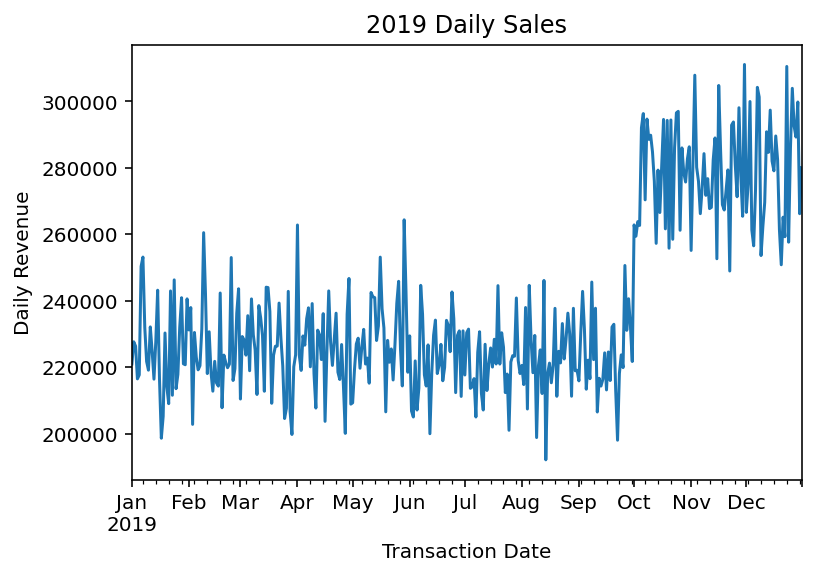

In [13]:
df_d_2019 = Sales_2019_Update.set_index('transactionDate')

Daily_Sales_2019 = df_d_2019.groupby(pd.Grouper(freq='D'))['cost'].sum()

ax = Daily_Sales_2019.plot()

ax.set_title('2019 Daily Sales')

ax.set_xlabel('Transaction Date')

ax.set_ylabel('Daily Revenue');

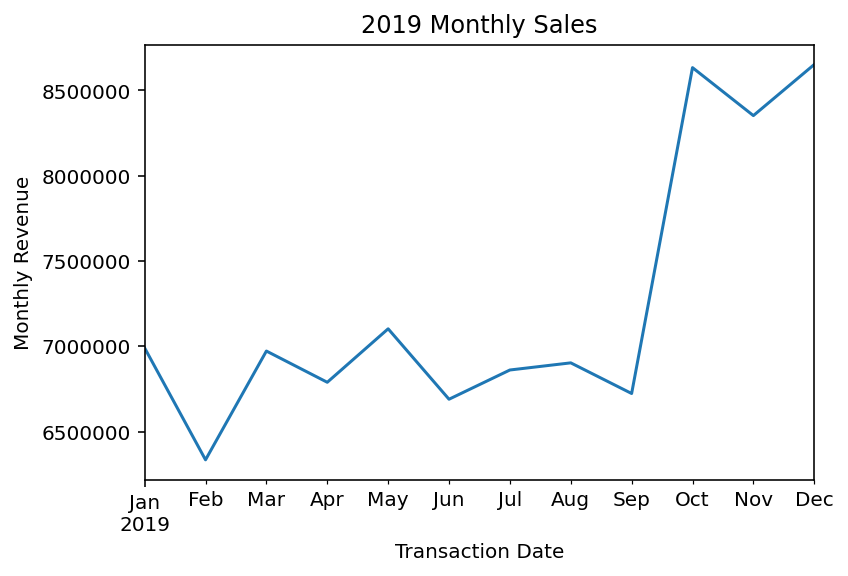

In [14]:
df_m_2019 = Sales_2019_Update.set_index('transactionDate')

Monthly_Sales_2019 = df_m_2019.groupby(pd.Grouper(freq='M'))['cost'].sum()

ax_m = Monthly_Sales_2019.plot()

ax_m.set_title('2019 Monthly Sales')

ax_m.set_xlabel('Transaction Date')

ax_m.ticklabel_format(style='plain', axis='y')

ax_m.set_ylabel('Monthly Revenue');

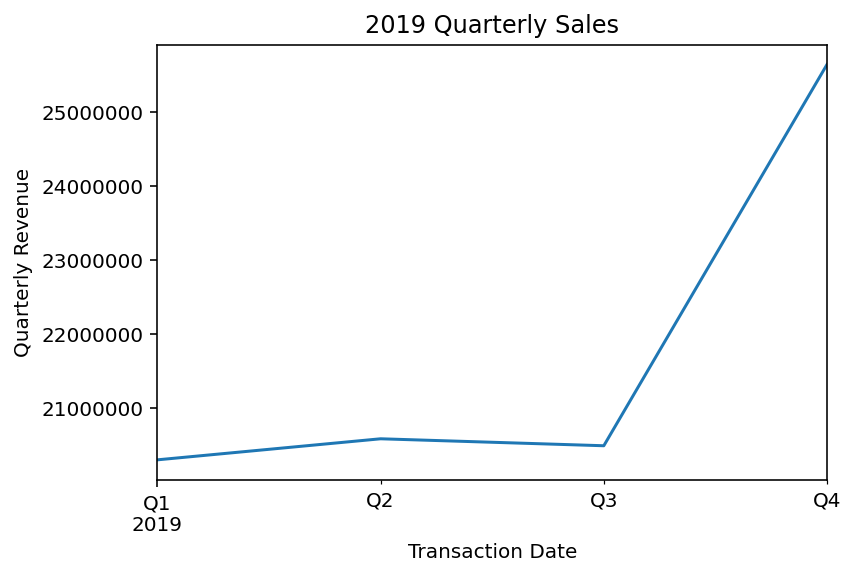

In [15]:
df_q_2019 = Sales_2019_Update.set_index('transactionDate')

Quarterly_Sales_2019 = df_q_2019.groupby(pd.Grouper(freq='Q'))['cost'].sum()

ax_q = Quarterly_Sales_2019.plot()

ax_q.set_title('2019 Quarterly Sales')

ax_q.set_xlabel('Transaction Date')

ax_q.ticklabel_format(style='plain', axis='y')

ax_q.set_ylabel('Quarterly Revenue');

**Answer 4c:** While looking at each of the three charts, it's evident that sales in quarter one, two and three of 2019 were on average relatively flat and consistent. While revenue varies by day or by month, the quarterly plot demonstrates how close the time periods were. It's evident however that sales picked up during quarter four, most likely due to sales for the fall and holiday season. 

**Answer 4d:** Looking at the montly sales data, one of the most significant events was the increase in sales during the month of October. Considering the sharp change from September to that point, it could be hypothesized that more shoes from Shunique were sold for the run up to Halloween, as well as the arrival of fall.

The hypotheis is based on the fact of which month it is (Halloween month), as well as the original map provided that demonstrated shoes sold per city (Mostly concentrated towards the east side of the country where fall could precipitate a change in shoe purchases). 

In order to examine the hypothesis, we would need to look at what attributes sold well during the month of october, where the consumers were generally located; as well as what days the purchases occured (Examing days could be useful to check if any promotions were going on at the time, or if any particular directives from the company were given). We would also want to analyze what shoes prices were the most prevelent - Certain types of purchases could help determine if some were more personal driven or more gift driven. 

## Question 5 (Code Below)

As we are approaching the winter months, Mr. Flatbush is sure that heels will be a big seller.  He wants to know if we are on track to outperform our past sales of heels (based on previous 2 months performance June 2020 and July 2020)? 

**(5a)** Create a regression model based on daily sales of heels for this time period. 

**(5b)** State and interpret the regression equation. 

**(5c)** Use your model to make a prediction for the sales on 8/1/2020.

**Answer 5a:** Regression model for daily heel sales between 6/1/2020 and 7/31/2020 below:

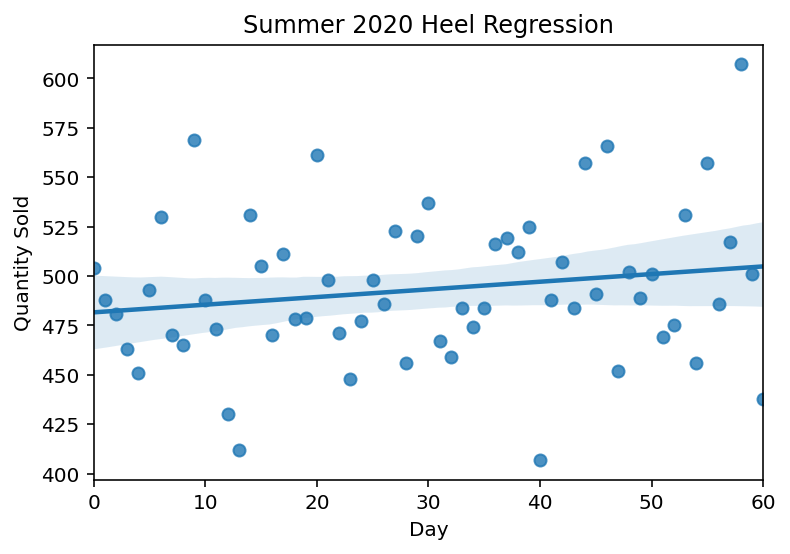

In [16]:
Summer_2020_Sales = Shunique[(Shunique['transactionDate'] >= '6/1/2020') & (Shunique['transactionDate'] <= '7/31/2020')]

Heel_Summer_2020_Sales = Summer_2020_Sales[(Summer_2020_Sales['category']=="heels")]

reg = Heel_Summer_2020_Sales.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

x=list(range(0, 61))

ax_reg = sns.regplot(x=x, y=reg['quantity'])

ax_reg.set_title('Summer 2020 Heel Regression')

ax_reg.set_xlabel('Day')

ax_reg.set_ylabel('Quantity Sold');

In [17]:
lin_reg = stats.linregress(x=x, y=reg['quantity'])

print(lin_reg)

LinregressResult(slope=0.38730830248545756, intercept=481.6102591221576, rvalue=0.18153043863302853, pvalue=0.16147427743927542, stderr=0.27315242944006063, intercept_stderr=9.501622079829255)


In [18]:
slope = lin_reg[0]

intercept = lin_reg[1]

r_value = lin_reg[2]

print(f"y = {slope}x + {intercept}")

print(f"Correlation Coefficient r: {r_value}")

y = 0.38730830248545756x + 481.6102591221576
Correlation Coefficient r: 0.18153043863302853


**Answer 5b:** In plain language, what this equation means is that we predict on day 1 (6/1/2020) there will be 481.61 pairs of heels sold plus an additional 0.387 pairs sold for each day during the summer.

The correlation coefficient tells us that the linear relationship between days and quantity sold is positive but weak.

While pairs of shoes can only be in full numbers, decimals are left in this example to correspond with the numbers delivered by the model.

**Answer 5c:** Based on our model and information below, we predict that sales of heels on 8/1/2020 will be 505.24 pairs.

While pairs of shoes can only be in full numbers, decimals are left in this example to correspond with the numbers delivered by the model.

In [19]:
day = 61

heel_pred = slope * day + intercept

print(f"We predict sales on 8/1/2020 to be {heel_pred:.2f} pairs of heels.")

We predict sales on 8/1/2020 to be 505.24 pairs of heels.


## Question 6 (Code Below)

A key metric for retail sales data is Average Purchase Value(APV).  APV measures the average value of each purchase made by your customers and will often compare that to the average number of units per transaction(ANU). The formula for APV is (Total Sales Revenue / Number of Customers or Transactions)

**(6a).** Calculate the Average Purchase Value for Q1 and Q4 of 2019.

**(6b).** Calculate the average number of units per transaction for Q1 and Q4

**(6c).** Describe the differences between Q1 and Q4 values.  Speculate on possible causes for differences(Hint: Seasonality)

**Answer 6a:** The Average Purchase Value (APV) for Q1 is \\$146.75 and the APV for Q4 is \\$182.46 

In [20]:
Q1_2019 = Sales_2019[Sales_2019['transactionDate'].dt.quarter == 1]

Q4_2019 = Sales_2019[Sales_2019['transactionDate'].dt.quarter == 4]

Q1_2019_APV = Q1_2019['cost'].sum()/Q1_2019['first_name'].count()

Q4_2019_APV = Q4_2019['cost'].sum()/Q4_2019['first_name'].count()

In [21]:
Q1_2019_APV

146.75329320579286

In [22]:
Q4_2019_APV

182.45593876984609

**Answer 6b:** The Average number of units per transaction (ANU) for Q1 is 1.55 and the ANU for Q4 is 1.90

In [23]:
Q1_2019_ANU = Q1_2019['quantity'].sum()/Q1_2019['first_name'].count()

Q4_2019_ANU = Q4_2019['quantity'].sum()/Q4_2019['first_name'].count()

In [24]:
Q1_2019_ANU

1.5485398636386642

In [25]:
Q4_2019_ANU

1.9030522562785104

**Answer 6c:** Looking at both APV and ANU for quarters 1 and 4 of 2019; we can see that quarter 1 is less for both metrics. One of the possible casues for this could be related to the holiday season that spans quarter 4: As consumers purchase for themselves, as well as gifts for others; we see both purchase value and units per transaction going up. 

We could theorize as well that weather during quarter four drives shoe purchases. As we see a fair amount of the business happens between the midwest and east coast (per the map at the top of the workbook) - As cooler weather approaches various styles, colors and materials may be driving sales up during the quarter. 

## Question 7 (Code Below)

Shunique is looking to expand its distribution centers so that it can outperform Zappos on delivery time to customers.  It is important to know what states and regions are epicenters for high sales and you have been asked to present the following results.

**(7a)** Report 2020 Sales by state - Present results tabularly 

**(7b)** In Tableau create a Map visualization of total sales(2018 - 2020) by Region [Northeast, West, Midwest, South].

**Answer 7a:** Sales by state for 2020 below:

In [26]:
Sales_2020[['state','cost']].groupby('state').sum().sort_values('cost', ascending=False)

,cost
state,
Texas,1238215.58
California,1219721.54
Florida,1143359.72
New York,1074477.72
Ohio,1021461.58
Virginia,1009027.82
Oklahoma,996220.92
Washington,994863.51
Georgia,988708.06


**Answer 7b:** Tableau visualization of total sales from 2018-2020 by region below:

<img src="Sales Map.png" />

## Question 8 (Code Below)

Use any type of plot to show the distribution of prices for the following shoe colors ('metallic', 'bronze', 'animal print', 'yellow')

**Answer 8:** Price distribution plots for metallic, bronze, animal print and yellow shoe colors below:

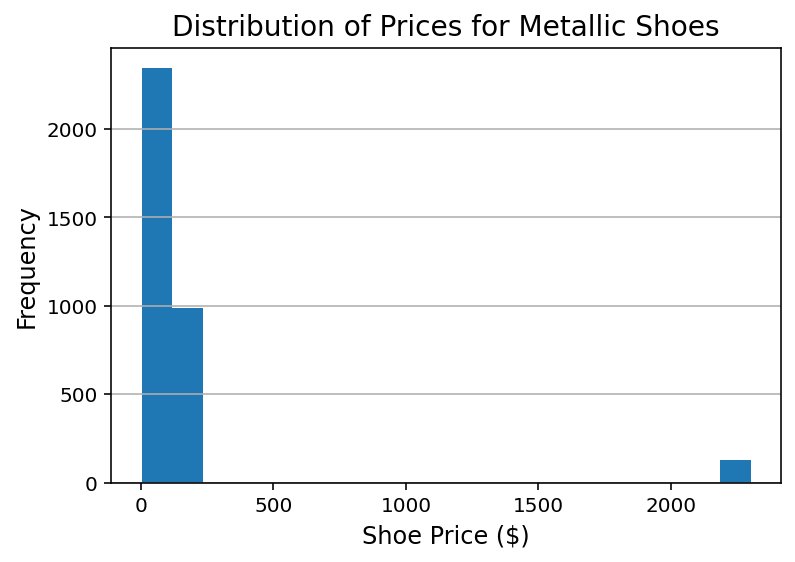

In [28]:
Metallic_Sales = Shunique[(Shunique['color']=="metallic")]

plt.hist(Metallic_Sales['prices'],bins=20)

plt.title('Distribution of Prices for Metallic Shoes', size=14)

plt.xlabel('Shoe Price ($)', size=12)

plt.ylabel('Frequency', size=12)

plt.grid(axis='y')

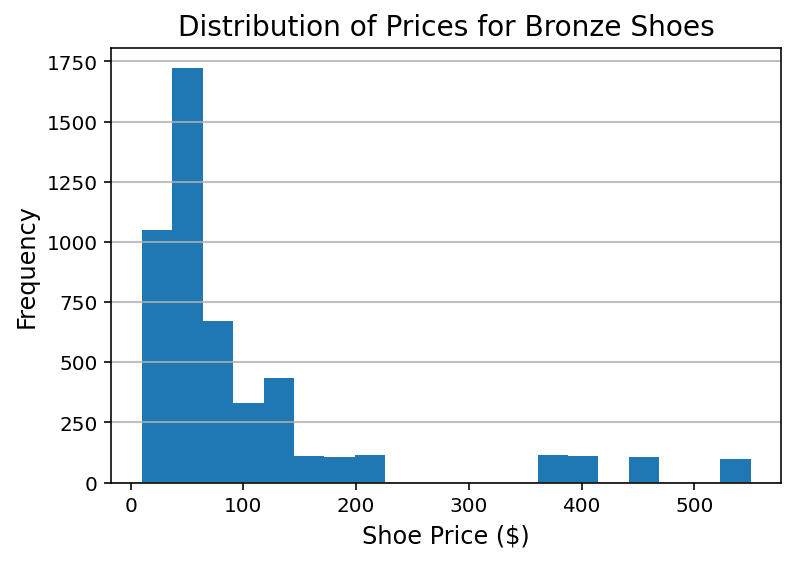

In [29]:
Bronze_Sales = Shunique[(Shunique['color']=="bronze")]

plt.hist(Bronze_Sales['prices'],bins=20)

plt.title('Distribution of Prices for Bronze Shoes', size=14)

plt.xlabel('Shoe Price ($)', size=12)

plt.ylabel('Frequency', size=12)

plt.grid(axis='y')

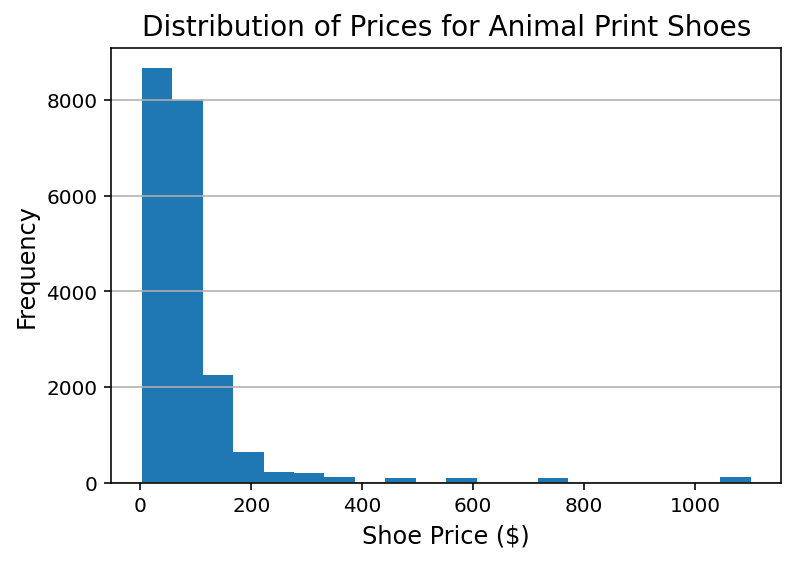

In [30]:
Animal_Sales = Shunique[(Shunique['color']=="animal print")]

plt.hist(Animal_Sales['prices'],bins=20)

plt.title('Distribution of Prices for Animal Print Shoes', size=14)

plt.xlabel('Shoe Price ($)', size=12)

plt.ylabel('Frequency', size=12)

plt.grid(axis='y')

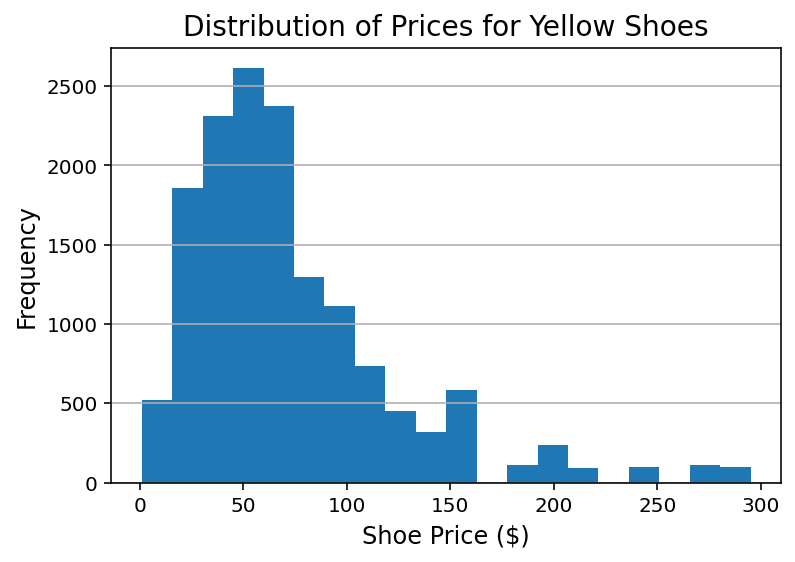

In [31]:
Yellow_Sales = Shunique[(Shunique['color']=="yellow")]

plt.hist(Yellow_Sales['prices'],bins=20)

plt.title('Distribution of Prices for Yellow Shoes', size=14)

plt.xlabel('Shoe Price ($)', size=12)

plt.ylabel('Frequency', size=12)

plt.grid(axis='y')

## Question 9 (Code Below)

The Shunique marketing team is desperate to find the next big shoe hit.  They have asked for your help. 

**(9a)** Select a unique combination of shoe attributes then create a summary report with various statistics (ie Average sales price, city with most sales, quarter with most shoes sold, Customer name with highest purchase, etc)[it is your choice].  If the shoe combo doesn't exist in the dataset then choose another combination.

Next quarter they are going to release an animal print, leather, strappy, basketball shoe.  

**Answer 9 Description:** For this summary report, we will be looking at black, leather, seamless sandals. The code and summary statistics are included below.

**Answer 9 Report Breakdown:** By utilizing the various summary reports below, we were able to learn about Shunique's black, leather, seamless sandals. For the time period over the life of the data, Shunique has sold 756 pairs, which was \\$84,160.09 in revnue. During that same time, the average sales price was \\$69.61, Christopher Smith bought the most pairs - 7 of them; and the following cities tied for the most sales, with five pairs each: Van Nuys - CA, Cherylchester - WI, Williammouth - WV, Brandybury - NV, Brandonview - FL & Amberbury - ND.

We decided to look at other data specifically during 2019 as that year had a full complete year of sales. When looking at that information, we learned that quarter 4 had the most shoes sold, with 187 pairs. Despite that quantity total however, quarter 2 had the highest average purchase value of \\$128.97. We also looked at total daily sales revenue. Our first distribution chart had mostly daily sales revenue at and below \\$500.00, so a second chart was made to examine the distribution more closely. Overall however, there appears to be little difference in the distribution of sales revenue between all four quarters. 

Based on the information we found, it would not seem that this particular shoe and attributes would be the next big shoe hit. Further R & D should be carried out on alternative designs and attributes.

**General Data Frame information:**

In [49]:
Unique_Shoe = Shunique[(Shunique['color']=="black") & (Shunique['materials']=="leather") & (Shunique['feature']=="seamless") & (Shunique['category']=="sandals")]

Unique_Shoe.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
341927,Elias,Dodshun,edodshunc0@sohu.com,Anaheim,18 Grim Terrace,California,2019-01-31,9472ae5b-418d-4372-b3e3-c5232097ee70,6:32 PM,2,Adidas Women's Predator Absolado Instinct Fg L...,black,leather,75.00,seamless,sandals,150.00,2019-01-31
341928,Linnell,Gomby,lgombyd@huffingtonpost.com,San Antonio,01114 Veith Road,Texas,2020-06-04,d909afb4-f41e-4a97-85cc-dbcb9b8ad698,5:09 AM,2,Adidas Women's Predator Absolado Instinct Fg L...,black,leather,75.00,seamless,sandals,150.00,2020-06-04
341929,Stanislas,Carlisi,scarlisi96@techcrunch.com,Amarillo,006 Lakeland Court,Texas,2019-08-01,2bdd823a-8fc3-483e-a9dd-46e3b1a80620,3:11 AM,1,Adidas Women's Predator Absolado Instinct Fg L...,black,leather,75.00,seamless,sandals,75.00,2019-08-01
341930,Kalli,Paydon,kpaydonhz@bizjournals.com,Atlanta,53550 Novick Plaza,Georgia,2020-06-15,18de6587-f70d-49dc-a017-6142e195dd82,12:23 PM,1,Adidas Women's Predator Absolado Instinct Fg L...,black,leather,75.00,seamless,sandals,75.00,2020-06-15
341931,Lazaro,Baldini,lbaldini49@wired.com,Columbus,83 Clarendon Pass,Ohio,2020-04-30,1fac7aae-12ef-43bf-8b86-8a09421da5d4,12:15 AM,2,Adidas Women's Predator Absolado Instinct Fg L...,black,leather,75.00,seamless,sandals,150.00,2020-04-30


**Summary Statistics:**

In [50]:
Unique_Shoe.describe()

,quantity,prices,cost
count,756.00,756.00,756.00
mean,1.60,69.61,111.32
std,0.95,37.92,94.98
min,1.00,23.99,23.99
25%,1.00,44.95,49.00
50%,1.00,57.20,75.00
75%,2.00,106.94,139.95
max,5.00,139.95,559.80


**Total Sales Between 2018-2020:**

In [52]:
Unique_Shoe['cost'].sum()

84160.09

**Average Sale Price Between 2018-2020:**

In [53]:
Average_Sale_Price = Unique_Shoe['prices'].sum()/Unique_Shoe['first_name'].count()

Average_Sale_Price

69.61117724867725

**2019 Average Purchase Value By Quarter:**

In [62]:
Unique_Sales_2019 = Unique_Shoe[(Unique_Shoe['transactionDate'] >= '1/1/2019') & (Unique_Shoe['transactionDate'] <= '12/31/2019')]

Unique_Q1_2019 = Unique_Sales_2019[Unique_Sales_2019['transactionDate'].dt.quarter == 1]

Unique_Q2_2019 = Unique_Sales_2019[Unique_Sales_2019['transactionDate'].dt.quarter == 2]

Unique_Q3_2019 = Unique_Sales_2019[Unique_Sales_2019['transactionDate'].dt.quarter == 3]

Unique_Q4_2019 = Unique_Sales_2019[Unique_Sales_2019['transactionDate'].dt.quarter == 4]

In [64]:
Unique_Q1_2019_APV = Unique_Q1_2019['cost'].sum()/Unique_Q1_2019['first_name'].count()

Unique_Q2_2019_APV = Unique_Q2_2019['cost'].sum()/Unique_Q2_2019['first_name'].count()

Unique_Q3_2019_APV = Unique_Q3_2019['cost'].sum()/Unique_Q3_2019['first_name'].count()

Unique_Q4_2019_APV = Unique_Q4_2019['cost'].sum()/Unique_Q4_2019['first_name'].count()

In [65]:
Unique_Q1_2019_APV

119.13357798165138

In [66]:
Unique_Q2_2019_APV

128.97586206896554

In [67]:
Unique_Q3_2019_APV

108.35960000000001

In [68]:
Unique_Q4_2019_APV

114.44834951456313

**2019 Quarter With Most Shoes Sold:**

In [73]:
Unique_Q1_2019['quantity'].sum()

170

In [74]:
Unique_Q2_2019['quantity'].sum()

142

In [75]:
Unique_Q3_2019['quantity'].sum()

150

In [76]:
Unique_Q4_2019['quantity'].sum()

187

**City With Most Sales:**

In [80]:
Unique_Shoe.groupby(by=['city', 'state']).sum().sort_values('quantity', ascending=False)[:10]

,,quantity,prices,cost
city,state,,,
Van Nuys,California,5,106.94,534.70
Cherylchester,Wisconsin,5,75.00,375.00
Williammouth,West Virginia,5,23.99,119.95
Brandybury,Nevada,5,57.20,286.00
Brandonview,Florida,5,44.95,224.75
Amberbury,North Dakota,5,57.20,286.00
South Nicholasview,Indiana,4,49.00,196.00
Johnland,Oregon,4,44.95,179.80
Jennaville,Colorado,4,139.95,559.80


**Customer Name With Most Purchases:**

In [77]:
Unique_Shoe.groupby(by=['first_name', 'last_name']).sum().sort_values('quantity', ascending=False)[:10]

,,quantity,prices,cost
first_name,last_name,,,
Christopher,Smith,7,119.95,404.80
Heather,Beltran,5,75.00,375.00
Susan,Jones,5,279.90,699.75
Cleve,Buncom,5,106.94,534.70
Gary,Jones,5,57.20,286.00
Emily,Williams,5,23.99,119.95
Christina,Williams,5,57.20,286.00
Michelle,Johnson,5,197.15,368.75
Tracy,Scott,5,44.95,224.75


**2019 Distribution of Daily Sales Totals By Quarter:**

In [81]:
Unique_Range_1 = Unique_Shoe[(Unique_Shoe['transactionDate'] >='1/1/2019') & (Unique_Shoe['transactionDate'] <= '3/31/2019')]

Unique_Range_2 = Unique_Shoe[(Unique_Shoe['transactionDate'] >='4/1/2019') & (Unique_Shoe['transactionDate'] <= '6/30/2019')]

Unique_Range_3 = Unique_Shoe[(Unique_Shoe['transactionDate'] >='7/1/2019') & (Unique_Shoe['transactionDate'] <= '9/30/2019')]

Unique_Range_4 = Unique_Shoe[(Unique_Shoe['transactionDate'] >='10/1/2019') & (Unique_Shoe['transactionDate'] <= '12/31/2019')]

Unique_Range_One = Unique_Range_1.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

Unique_Range_Two = Unique_Range_2.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

Unique_Range_Three = Unique_Range_3.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

Unique_Range_Four = Unique_Range_4.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

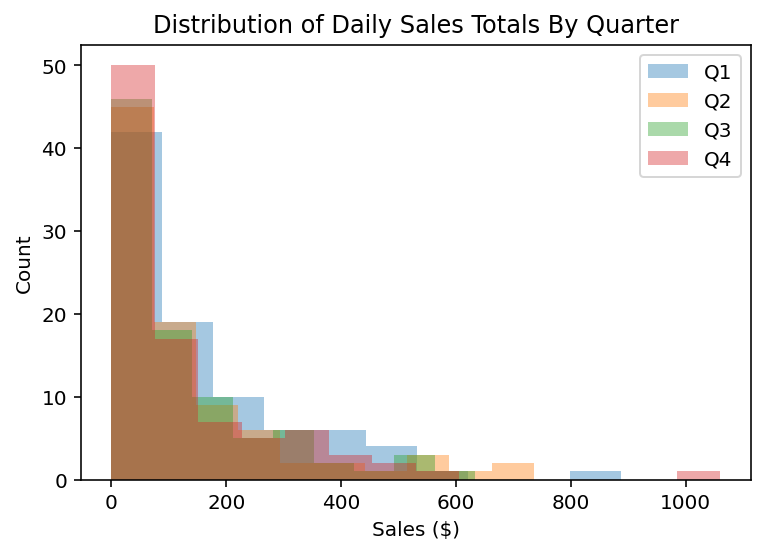

In [83]:
g = sns.distplot(Unique_Range_One['cost'], label="Q1", kde=False)

sns.distplot(Unique_Range_Two['cost'], label="Q2", kde=False)

sns.distplot(Unique_Range_Three['cost'], label="Q3", kde=False)

sns.distplot(Unique_Range_Four['cost'], label="Q4", kde=False)

g.set(xlabel='Sales ($)', ylabel='Count', title='Distribution of Daily Sales Totals By Quarter')

plt.legend()

plt.show()

/Users/danielbachman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/danielbachman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/danielbachman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

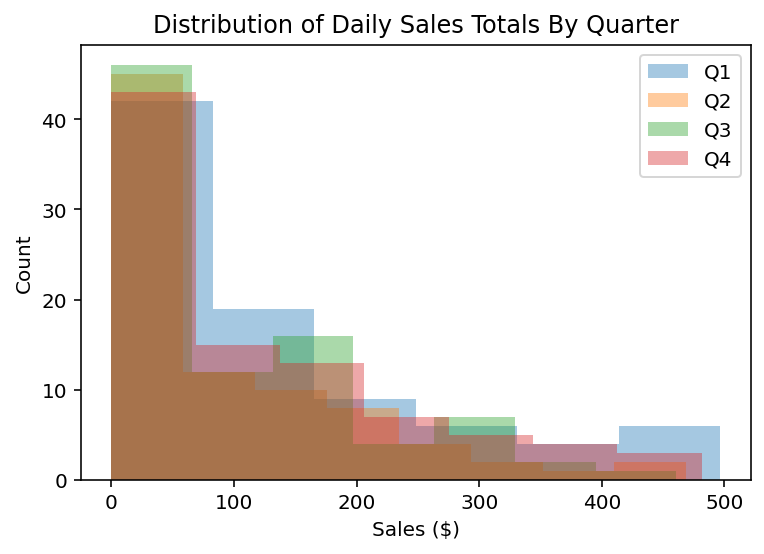

In [84]:
g = sns.distplot(Unique_Range_One['cost'][Unique_Range_One['cost'] < 500], label="Q1", kde=False)

sns.distplot(Unique_Range_Two['cost'][Unique_Range_Two['cost'] < 500], label="Q2", kde=False)

sns.distplot(Unique_Range_Three['cost'][Unique_Range_Three['cost'] < 500], label="Q3", kde=False)

sns.distplot(Unique_Range_Four['cost'][Unique_Range_Four['cost'] < 500], label="Q4", kde=False)

g.set(xlabel='Sales ($)', ylabel='Count', title='Distribution of Daily Sales Totals By Quarter')

plt.legend()

plt.show()

## Question 10 (Code Below)

**(10a)** Are there opportunities to grow sales?  

**(10b)** Are there products that you would discontinue? 

**(10c)** What other datasets would you use to complement the transaction data and why?

**Answer 10a:** As evidenced by various data research within this report, there are opportunities to grow sales. 

Referring to section four, sales in 2019 were fairly consistent for the first three quarters, but much higher during quarter four/the holiday season. Utilizing this information, and digging into it further, would yield more clues about attributes, prices and consumers that tell a story about the data.

With regards to section eleven, it was apparent that the sales team did increase sales year-over-year, while also delivering days with higher daily sales in 2019 than 2018. There is opportunities to grow sales through their efforts.

Lastly, when considering high revenue SKU's from section one, compared against low revenue SKU's from answer 10b below, it is evident that stylish styles and attributes (In line with the original concept by Mr. Flatbush) perform better than preowned/low cost styles. Continuing research on high revenue styles, along with comparisons against regional areas, will provide guidance for growing sales. 

**Answer 10b:** We looked across the board to see what products should be discontinued; this included looking at poor performing SKU's by name, color, material, feature and category.

As demonstrated by the first data frame, we have multiple SKUs, including many that are pre owned, that have brought in less than \\$200.00 in revenue for the full time period of data. These should be discontinued.

With consideration to the materials category, we see that felt has only brough in \\$3,488.71 worth of revenue for the time period, where as the next closest material, satin, is just under \\$60,000.00 in revenue. Products made with felt should be considered for discontinuation.

When observing color, features, or categories, those filtering elements are not as clear cut as we see the lowest revenue in the hundreds of thousands range. These were not as useful in determining products or product features that should be discontinued. 

In [86]:
Shunique.groupby(by='name').sum().sort_values('cost', ascending=True)[:10]

,quantity,prices,cost
name,,,
Guess Ortena2 Bronze/black Ankle Booties Boots Size 6.5,181,0.99,1.81
Bcbgeneration Anais Women Us 6.5 Tan Thong Sandal Pre Owned Blemish 1665,140,93.06,138.60
"Trotters 1650 Womens Black Patent Leather Heels Pumps Shoes 7 Wide (c,d,w) Bhfo",148,89.10,146.52
Kenneth Cole Reactio Slim Shake Women Us 7.5 Black Pre Owned 1654,154,102.96,152.46
Kensie Veronica Women Us 8.5 Blue Sneakers Pre Owned 1906,167,101.97,165.33
Bella Vita Sangria Women Us 7.5 N/s White Wedge Sandal Blemish 1903,176,113.85,174.24
Nina Falana-vg Women Us 6 Silver Sandals Pre Owned 1904,182,114.84,180.18
Mix No 6 Sarti Women Us 8 Green Platform Heel Pre Owned 1650,186,118.80,184.14
Alfani Hannia Women Us 8.5 Gold Thong Sandal Pre Owned 1904,193,115.83,191.07


In [88]:
Shunique.groupby(by='color').sum().sort_values('cost', ascending=True)[:10]

,quantity,prices,cost
color,,,
unknown,2160,96829.48,156715.63
clear,2301,164237.18,256104.94
mahogany,3835,204577.23,328054.59
coral,5756,389151.85,620338.57
khaki,8004,462446.43,722236.44
bronze,7872,505149.79,802337.05
metallic,5474,559318.76,890078.48
olive,9390,551451.18,890143.66
purple,13383,765776.24,1209295.05


In [87]:
Shunique.groupby(by='materials').sum().sort_values('cost', ascending=True)[:10]

,quantity,prices,cost
materials,,,
felt,179,1987.98,3488.71
satin,1357,36847.94,59431.02
latex,1876,57796.97,91771.44
cotton,2570,110651.50,174048.06
polyester,2494,115648.29,184445.42
mesh,2957,157528.77,252730.13
nylon,15857,1181677.15,1880305.39
wool,16509,1195124.36,1920694.23
foam,17463,1301683.12,2045465.94


In [89]:
Shunique.groupby(by='feature').sum().sort_values('cost', ascending=True)[:10]

,quantity,prices,cost
feature,,,
antimicrobial,48982,2480620.86,3963959.03
wide toe box,52522,2634345.81,4200706.95
fitness tracking,52450,2855715.83,4556395.21
sustainably certified,55601,2896533.83,4607046.67
puncture resistant,52453,2912993.81,4636841.88
lightweight,49546,2943801.43,4673061.01
handmade,54562,2999045.90,4828614.74
waterproof,49670,3041860.90,4890465.37
organic,50132,3097045.13,4937389.33


In [90]:
Shunique.groupby(by='category').sum().sort_values('cost', ascending=True)[:10]

,quantity,prices,cost
category,,,
boat shoes,3310,172850.67,266751.16
oxfords,17614,850253.65,1360919.95
slippers,16147,986294.12,1561629.71
clogs,31968,1837833.56,2940678.16
gym,69180,3900517.96,6182520.59
basketball,70669,3951035.07,6273672.75
soccer,70042,4038166.97,6466656.07
skateboarding,64455,4058865.04,6466783.97
loafers,73976,4212415.72,6708366.67


**Answer 10c:** In terms of other datasets, we would look to aquire data on regional employment information, income data and weather data.

Regional employment information and income data, while similar, would provide a couple different view points. In areas with high or low unemployment, do Shunique's products do better or worse? Is there any correlation? Perhaps high unemployment drives lower shoe sells on high priced items, but are there impacts on lower priced SKUs? Similarly utilizing income data would allow Shunique to examine their most common consumer - Understanding their income levels and what products sell well in those areas would help research and development.

While weather data may seem an odd data set to consider, it would be interesting to compare daily or average temperatures across large spans of time - Are there any connections between weather and shoe sales? If so should promotions be run during that period? Is there any link between region, weather, time of year and shoe purchases? Understanding these influences could again assist with research and development; but could also assist with understanding how much inventory to carry and other general forecasting processes. 

## Question 11 (Code Below)

The sales team is asking for increased bonuses because they increased daily sales year-over-year. 

**(11)** Calculate the daily sales totals (cost) for the date ranges 8/1/2018-7/31/2019 and 8/1/2019-7/31/2020. Describe and compare the two distributions (center, variability, spread, and anomalies). Create a graphical display that makes this easy to understand.

In [32]:
Sales_Range_1 = Shunique[(Shunique['transactionDate'] >='8/1/2018') & (Shunique['transactionDate'] <= '7/31/2019')]

Sales_Range_2 = Shunique[(Shunique['transactionDate'] >='8/1/2019') & (Shunique['transactionDate'] <= '7/31/2020')]

First_Range = Sales_Range_1.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

Second_Range = Sales_Range_2.set_index('transactionDate').groupby(pd.Grouper(freq='D')).sum()

Summary statistics for sales by year for 8/1/2018-7/31/2019 (First Range) and 8/1/2019-7/31/2020 (Second Range):

In [33]:
First_Range['cost'].describe()

count      364.00
mean    218958.35
std      14907.16
min     184474.90
25%     208845.96
50%     218509.85
75%     228999.31
max     264349.60
Name: cost, dtype: float64

In [34]:
Second_Range['cost'].describe()

count      366.00
mean    237762.99
std      27057.03
min     192098.67
25%     219427.38
50%     227949.06
75%     253349.59
max     311104.73
Name: cost, dtype: float64

/Users/danielbachman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


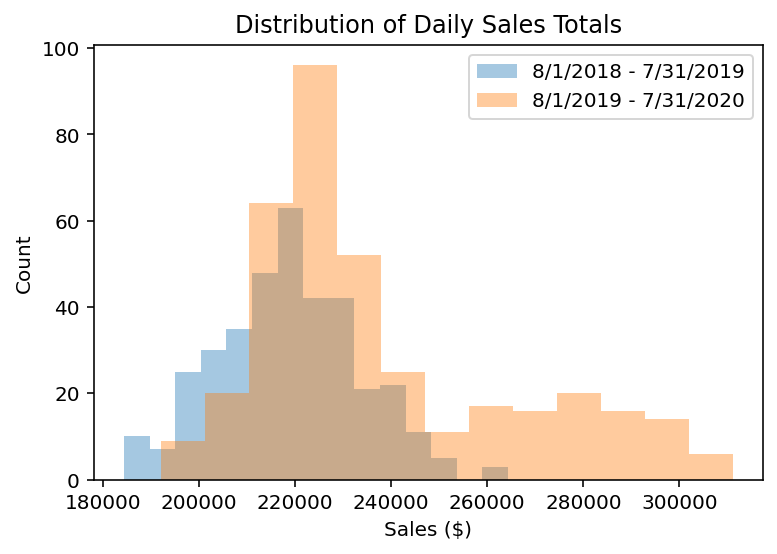

In [35]:
ax = sns.distplot(First_Range['cost'], label="8/1/2018 - 7/31/2019", kde=False)

sns.distplot(Second_Range['cost'], label="8/1/2019 - 7/31/2020", kde=False)

ax.set(xlabel='Sales ($)', ylabel='Count', title='Distribution of Daily Sales Totals')

plt.legend()

plt.show()

**Answer 11:** For daily sales, there were 364 days of sales between 8/1/2018 - 7/31/2019 and 366 days of sales between 8/1/2019 - 7/31/2020. The mean value of daily total sales was \\$218,958.35 for the first range, and increased to \\$237,762.99 for the second range. The standard deviation of daily total sales was \\$14,907.16 for the first range and increased to \\$27,057.03 for the second range. Both years, the distribution of daily total sales was fairly symetric and bell shaped; although the second range is skewed to the right. This could be caused by lower levels of the data being lower overall compared to the rest of the data set. Based on the plot above, the second range of dates had more days of similar daily sales, while also generally having higher daily sales totals. In this instance, bonuses would be warranted.

## Question 12

Looking at the summary, the CEO says the sales don't look that different. 

**(12)** Is the difference in sales statistically significant enough to justify increased bonuses? (Answer using inference, either a significance test or comparison of confidence intervals) 

**Answer 12 - Process One:**

A t-test will be performed for the difference between the sample means for the first date range and the second date range, with a significance level $\alpha$ = .05. 

Hypotheses:

**H<sub>0</sub>**: $\mu$<sub>Second Range</sub> - $\mu$<sub>First Range</sub> = 0

(There is no difference in mean daily total sales)

**H<sub>a</sub>**: $\mu$<sub>Second Range</sub> - $\mu$<sub>First Range</sub> > 0

(The mean daily total sales in the second time period were greater than in the first time period)

In [36]:
stats.ttest_ind(Second_Range['cost'], First_Range['cost'], equal_var=False)

Ttest_indResult(statistic=11.638152319547563, pvalue=3.1466556982154746e-28)

**Answer 12 - Conclusion One:** Because the p-value 3e-28 is close to zero and less than our significance level .05, we have convincing evidence for the null hypothesis. The data supports the claim that the sales teams increased daily sales year-over-year.

**Answer 12 - Process Two:**

In [37]:
import statsmodels.stats.api as sms

summary_first_range = sms.DescrStatsW(First_Range['cost'])
print(f'95% confidence interval for the first range of daily total sales: {summary_first_range.tconfint_mean()}')

summary_second_range = sms.DescrStatsW(Second_Range['cost'])
print(f'95% confidence interval for the second range of daily total sales: {summary_second_range.tconfint_mean()}')

95% confidence interval for the first range of daily total sales: (217421.81478457278, 220494.88768795496)
95% confidence interval for the second range of daily total sales: (234981.8063408506, 240544.179287565)


**Answer 12 - Conclusion Two:** Because the 95% confidence intervals for mean daily sales total do not overlap, and the confidence interval for the second range of dates is higher; we have convincing evidence to support the sales teams claim that they increased daily sales year-over-year.